In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as mfm
import os
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import re
import networkx as nx 
import matplotlib

In [2]:
df_sanskrit_words = pd.read_csv('sanskrit_words.csv')
df_hindi_words = pd.read_csv('hindi_words.csv')

df_sanskrit_words = df_sanskrit_words.sort_values(by=['frequency'], ascending=False)
df_hindi_words = df_hindi_words.sort_values(by=['frequency'], ascending=False)

print("Total number of words in Sanskrit corpus: ", len(df_sanskrit_words))
print("Total number of words in Hindi corpus: ", len(df_hindi_words))

df_hindi_words=df_hindi_words.head(7000)
df_sanskrit_words=df_sanskrit_words.head(7000)

print("Total number of words in Sanskrit corpus: ", len(df_sanskrit_words))
print("Total number of words in Hindi corpus: ", len(df_hindi_words))

df_sanskrit_words.to_csv('sanskrit_words_top7000.csv', index=False)
df_hindi_words.to_csv('hindi_words_top7000.csv', index=False)

Total number of words in Sanskrit corpus:  7102
Total number of words in Hindi corpus:  9673
Total number of words in Sanskrit corpus:  7000
Total number of words in Hindi corpus:  7000


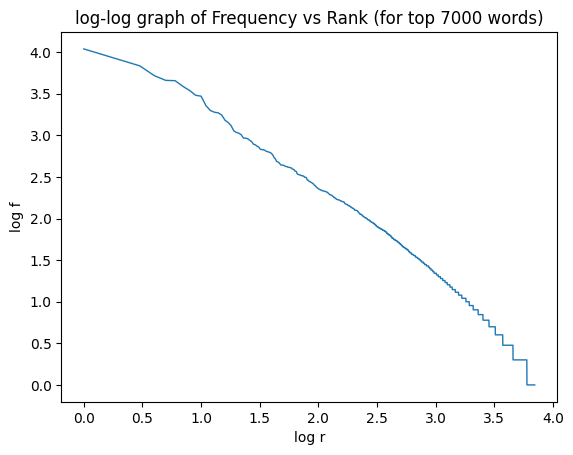

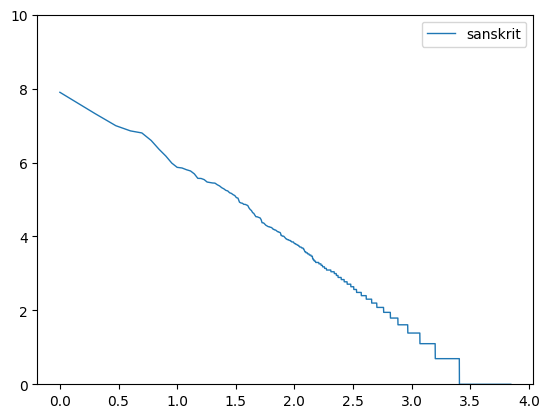

In [3]:
rank = np.array(range(1,len(df_hindi_words)+1))
# plot log-log graph of frequency vs rank
plt.figure()
ax=plt.axes()
xlog = np.log10(rank)
ylog = np.log10(df_hindi_words['frequency'])



plt.title('log-log graph of Frequency vs Rank (for top 7000 words)')

plt.xlabel('log r')
plt.ylabel('log f')
plt.plot(xlog, ylog,  linestyle='-', linewidth=1, label='hindi')

plt.figure()


plt.ylim(0, 10)
ylog = np.log(df_sanskrit_words['frequency'])
plt.plot(xlog, ylog,  linestyle='-', linewidth=1, label='sanskrit')


plt.legend()
plt.savefig(f'frequency_vs_rank.png')

plt.show()

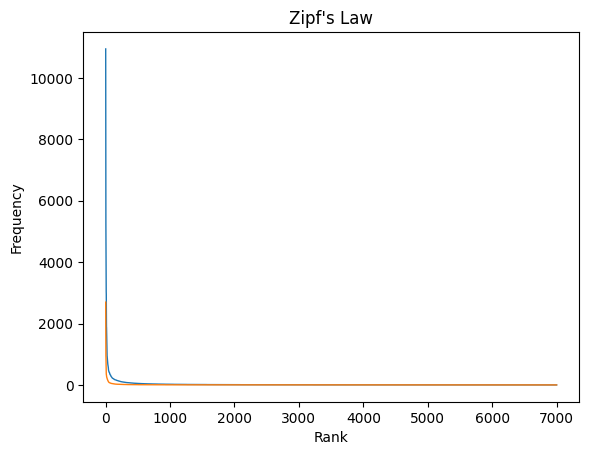

In [4]:
plt.figure()
plt.plot(rank, df_hindi_words['frequency'],  linestyle='-', linewidth=1, label='hindi')
plt.plot(rank, df_sanskrit_words['frequency'],  linestyle='-', linewidth=1, label='sanskrit')
plt.title('Zipf\'s Law')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.savefig(f'Zipf.png')
plt.show()

In [5]:
# identify max length of word in corpus
max_len = 0
for word in df_sanskrit_words['word']:
    if len(word) > max_len:
        max_len = len(word)
        
print("Max length of word in Sanskrit corpus: ", max_len)

for word in df_hindi_words['word']:
    if len(word) > max_len:
        max_len = len(word)

print("Max length of word in Hindi corpus: ", max_len)

Max length of word in Sanskrit corpus:  22
Max length of word in Hindi corpus:  22


In [6]:
df_WlSanskrit = pd.DataFrame(columns=['Length', 'frequency'])
df_WlHindi = pd.DataFrame(columns=['Length', 'frequency'])

for i in range(0,22):
    df_WlSanskrit.loc[i] = [i+1, 0]
    df_WlHindi.loc[i] = [i+1, 0]

In [7]:
for word in df_sanskrit_words['word']:
    df_WlSanskrit.loc[len(word)-1, 'frequency'] += 1
    
for word in df_hindi_words['word']:
    df_WlHindi.loc[len(word)-1, 'frequency'] += 1
    
df_WlSanskrit.to_csv('sanskrit_word_length.csv', index=False)
df_WlHindi.to_csv('hindi_word_length.csv', index=False)
    

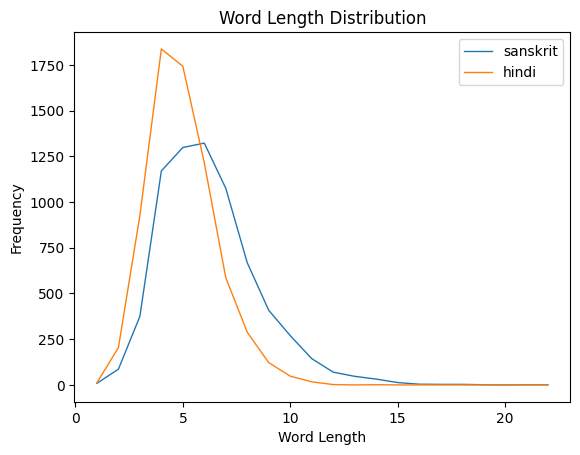

In [8]:
plt.figure()
plt.plot(df_WlSanskrit['Length'], df_WlSanskrit['frequency'],  linestyle='-', linewidth=1, label='sanskrit')
plt.plot(df_WlHindi['Length'], df_WlHindi['frequency'],  linestyle='-', linewidth=1, label='hindi')
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(f'WordLengthDistributionWithoutFreq.png')
plt.show()



In [9]:
# calculate average word length in dl_WlSanskrit

sum = 0
for i in range(0,22):
    sum += df_WlSanskrit.loc[i, 'Length'] * df_WlSanskrit.loc[i, 'frequency']

print("Average word length in Sanskrit corpus: ", sum/len(df_sanskrit_words))

# calculate average word length in dl_WlHindi

sum = 0
for i in range(0,22):
    sum += df_WlHindi.loc[i, 'Length'] * df_WlHindi.loc[i, 'frequency']
    
print("Average word length in Hindi corpus: ", sum/len(df_hindi_words))



Average word length in Sanskrit corpus:  6.222571428571428
Average word length in Hindi corpus:  4.964571428571428
